In [1]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('Piggybank.db')

# Query to select data from your table
query = "SELECT * FROM CUSTOMER_CAR"

# Use pandas to read data from SQL query into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [2]:
#check data type of each column
df.dtypes

CUSTOMER_ID               int64
HOUSEHOLD_ID              int64
INCOME_ID                 int64
LOAN_ID                   int64
REPORTING_DATE           object
BUCKET                    int64
AGE                       int64
EDUCATION                object
MARRIED                  object
HOUSE_OWNER              object
CHILD_NO                  int64
HH_MEMBERS                int64
FIRST_JOB                object
INCOME                    int64
INSTALLMENT_NM          float64
LOAN_AMT                float64
INSTALLMENT_AMT         float64
PAST_DUE_AMT            float64
BUCKET_PAST_DUE_AMT     float64
PAID_AMT                float64
DPD                       int64
INTODEFAULT              object
INTODEFAULT_New          object
INTODEFAULT_mismatch     object
dtype: object

In [3]:
#Aggreate data by buckets
summary_buckets = df.groupby('BUCKET').agg({'INSTALLMENT_AMT':'sum',
                                                 'PAID_AMT':'sum',
                                                 'BUCKET_PAST_DUE_AMT':'sum',
                                                 'PAST_DUE_AMT':'sum'})
summary_buckets.reset_index(inplace=True)

In [4]:
#Filter the most recent 3 buckets to show
last_three_buckets = summary_buckets['BUCKET'].nlargest(3)
last_three_buckets = last_three_buckets.tolist()
summary_buckets = summary_buckets.loc[summary_buckets['BUCKET'].isin(last_three_buckets)]

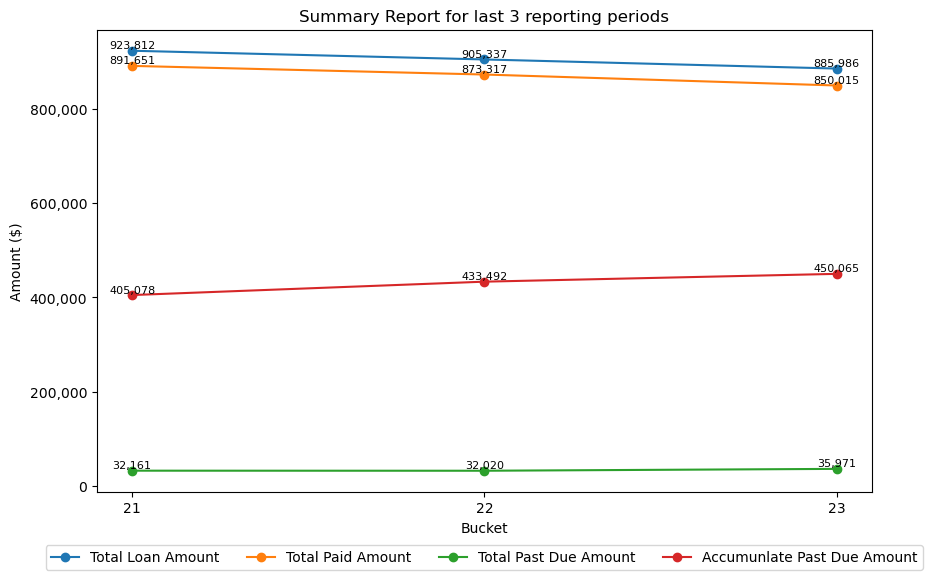

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
plt.plot(summary_buckets['BUCKET'], summary_buckets['INSTALLMENT_AMT'], label='Total Loan Amount', marker='o')
plt.plot(summary_buckets['BUCKET'], summary_buckets['PAID_AMT'], label='Total Paid Amount', marker='o')
plt.plot(summary_buckets['BUCKET'], summary_buckets['BUCKET_PAST_DUE_AMT'], label='Total Past Due Amount', marker='o')
plt.plot(summary_buckets['BUCKET'], summary_buckets['PAST_DUE_AMT'], label='Accumunlate Past Due Amount', marker='o')

plt.xlabel('Bucket')
plt.ylabel('Amount ($)')
plt.title('Summary Report for last 3 reporting periods')

# Add legend below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set custom ticks on x-axis
plt.xticks(summary_buckets['BUCKET'])

# Format y-axis tick labels with commas for thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate data labels for each point
for col in ['INSTALLMENT_AMT', 'PAID_AMT', 'BUCKET_PAST_DUE_AMT', 'PAST_DUE_AMT']:
    for x, y in zip(summary_buckets['BUCKET'], summary_buckets[col]):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom', fontsize=8)

plt.show()

In [6]:
summary_buckets_dpd = df.groupby(['BUCKET','DPD']).agg({'BUCKET_PAST_DUE_AMT':'sum',
                                                 'PAST_DUE_AMT':'sum'})
summary_buckets_dpd.reset_index(inplace=True)

In [7]:
last_twelve_buckets = summary_buckets_dpd['BUCKET'].drop_duplicates().nlargest(12)

In [8]:
summary_buckets_dpd_30 = summary_buckets_dpd[summary_buckets_dpd['DPD'] == 1]
summary_buckets_dpd_60 = summary_buckets_dpd[summary_buckets_dpd['DPD'] == 2]
summary_buckets_dpd_90 = summary_buckets_dpd[summary_buckets_dpd['DPD'] == 3]

In [9]:
summary_buckets_dpd_30 = summary_buckets_dpd_30.loc[summary_buckets_dpd_30['BUCKET'].isin(last_twelve_buckets)]
summary_buckets_dpd_60 = summary_buckets_dpd_60.loc[summary_buckets_dpd_60['BUCKET'].isin(last_twelve_buckets)]
summary_buckets_dpd_90 = summary_buckets_dpd_90.loc[summary_buckets_dpd_90['BUCKET'].isin(last_twelve_buckets)]

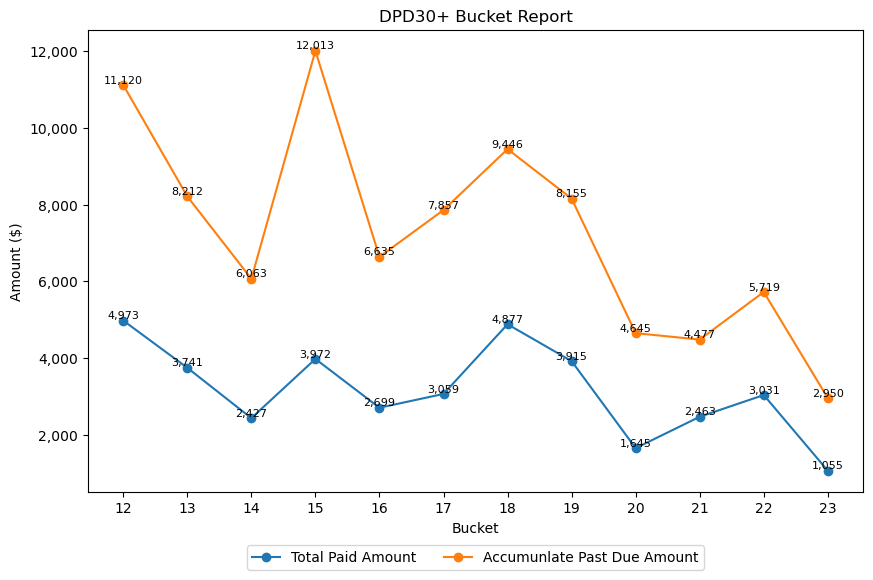

In [10]:
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
plt.plot(summary_buckets_dpd_30['BUCKET'], summary_buckets_dpd_30['BUCKET_PAST_DUE_AMT'], label='Total Paid Amount', marker='o')
plt.plot(summary_buckets_dpd_30['BUCKET'], summary_buckets_dpd_30['PAST_DUE_AMT'], label='Accumunlate Past Due Amount', marker='o')

plt.xlabel('Bucket')
plt.ylabel('Amount ($)')
plt.title('DPD30+ Bucket Report')

# Add legend below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set custom ticks on x-axis
plt.xticks(summary_buckets_dpd_30['BUCKET'])

# Format y-axis tick labels with commas for thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate data labels for each point
for col in ['BUCKET_PAST_DUE_AMT', 'PAST_DUE_AMT']:
    for x, y in zip(summary_buckets_dpd_30['BUCKET'], summary_buckets_dpd_30[col]):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom', fontsize=8)

plt.show()

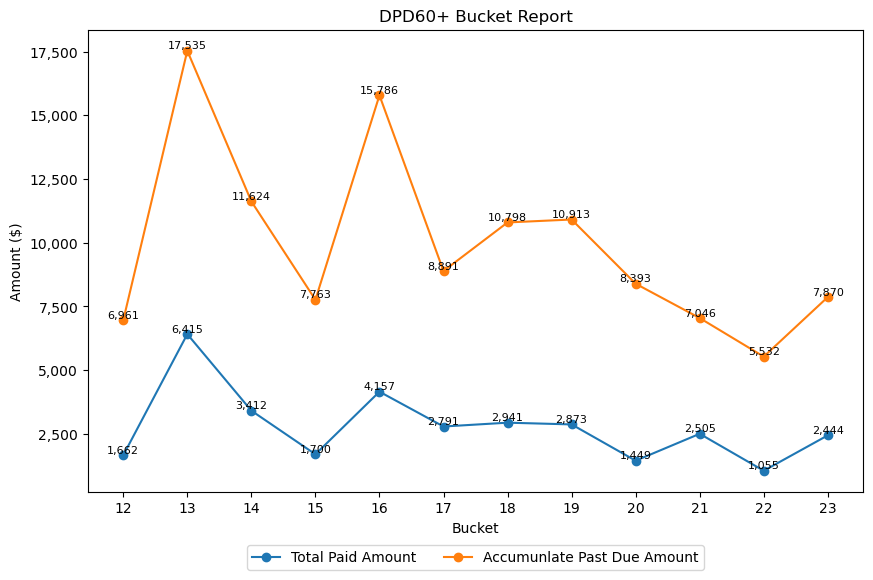

In [11]:
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
plt.plot(summary_buckets_dpd_60['BUCKET'], summary_buckets_dpd_60['BUCKET_PAST_DUE_AMT'], label='Total Paid Amount', marker='o')
plt.plot(summary_buckets_dpd_60['BUCKET'], summary_buckets_dpd_60['PAST_DUE_AMT'], label='Accumunlate Past Due Amount', marker='o')

plt.xlabel('Bucket')
plt.ylabel('Amount ($)')
plt.title('DPD60+ Bucket Report')

# Add legend below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set custom ticks on x-axis
plt.xticks(summary_buckets_dpd_60['BUCKET'])

# Format y-axis tick labels with commas for thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate data labels for each point
for col in ['BUCKET_PAST_DUE_AMT', 'PAST_DUE_AMT']:
    for x, y in zip(summary_buckets_dpd_60['BUCKET'], summary_buckets_dpd_60[col]):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom', fontsize=8)

plt.show()

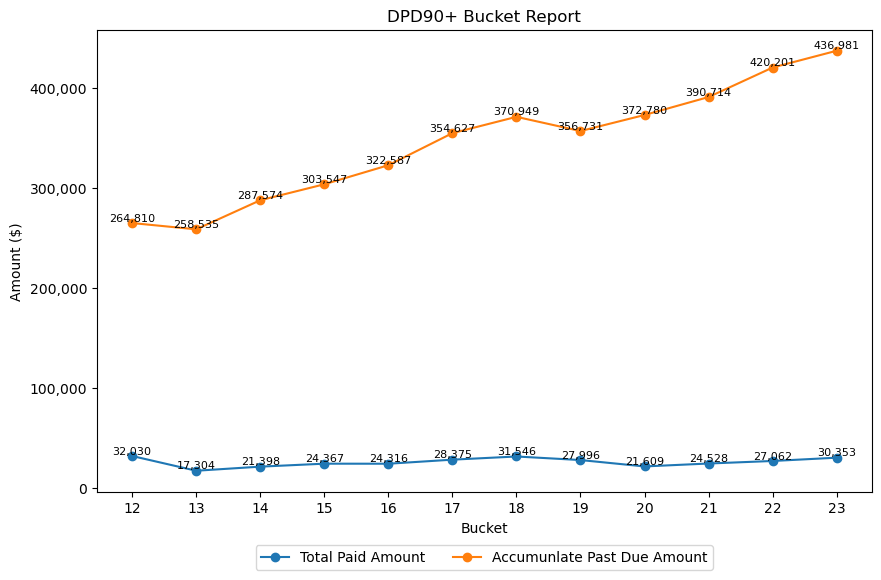

In [12]:
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
plt.plot(summary_buckets_dpd_90['BUCKET'], summary_buckets_dpd_90['BUCKET_PAST_DUE_AMT'], label='Total Paid Amount', marker='o')
plt.plot(summary_buckets_dpd_90['BUCKET'], summary_buckets_dpd_90['PAST_DUE_AMT'], label='Accumunlate Past Due Amount', marker='o')

plt.xlabel('Bucket')
plt.ylabel('Amount ($)')
plt.title('DPD90+ Bucket Report')

# Add legend below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Set custom ticks on x-axis
plt.xticks(summary_buckets_dpd_90['BUCKET'])

# Format y-axis tick labels with commas for thousands
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Annotate data labels for each point
for col in ['BUCKET_PAST_DUE_AMT', 'PAST_DUE_AMT']:
    for x, y in zip(summary_buckets_dpd_90['BUCKET'], summary_buckets_dpd_90[col]):
        plt.text(x, y, '{:,.0f}'.format(y), ha='center', va='bottom', fontsize=8)

plt.show()